<a href="https://colab.research.google.com/github/escorpio11/programa-python/blob/main/UNI/VISUALIZACION_DE_DATOS/M%C3%93DULO_3_Matplotlib_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

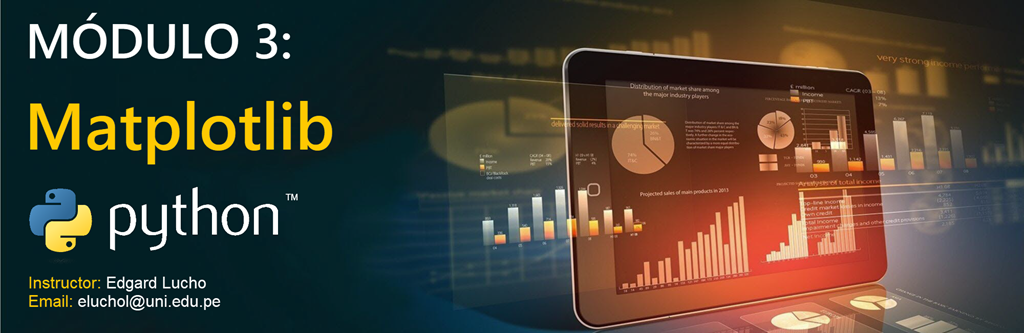

<table width='99%'>
<tr>
<td bgcolor='#306998'>

# **<font color="#FFFFFF">Módulo 3: Matplotlib</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Carga de los datos</font>**

</td>
</tr>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

df_DimCurrency = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimCurrency')
df_DimPromotion = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimPromotion')
df_DimEmployee = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimEmployee')
df_DimGeography = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimGeography')
df_DimProduct = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimProduct')
df_DimProductCategory = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimProductCategory')
df_DimProductSubcategory = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimProductSubcategory')
df_DimSalesTerritory = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='DimSalesTerritory')
df_FactResellerSales = pd.read_excel('drive/MyDrive/db/empresa.xlsx', sheet_name='FactResellerSales')

fecha_min = df_FactResellerSales['OrderDate'].min()
fecha_max = df_FactResellerSales['OrderDate'].max()

fechas = pd.date_range(fecha_min, fecha_max, freq='D')

df_DimCalendario = pd.DataFrame({'Fecha': fechas})

df_DimCalendario['Año'] = df_DimCalendario['Fecha'].dt.year
df_DimCalendario['Semestre'] = np.where(df_DimCalendario['Fecha'].dt.month <= 6, 'S-1', 'S-2')
df_DimCalendario['Trimestre'] = ((df_DimCalendario['Fecha'].dt.month -1) // 3 + 1).apply(lambda x: f'T-{x}')
df_DimCalendario['Mes'] = df_DimCalendario['Fecha'].dt.month_name()
df_DimCalendario['MesAbr'] = df_DimCalendario['Fecha'].dt.month_name().str[:3]
df_DimCalendario['MesNum'] = df_DimCalendario['Fecha'].dt.month
df_DimCalendario['SemAño'] = df_DimCalendario['Fecha'].dt.isocalendar().week
df_DimCalendario['Dia'] = df_DimCalendario['Fecha'].dt.day_name()
df_DimCalendario['DiaAbr'] = df_DimCalendario['Fecha'].dt.day_name().str[:3]
df_DimCalendario['DiaNumSem'] = df_DimCalendario['Fecha'].dt.dayofweek + 1
df_DimCalendario['DiaMes'] = df_DimCalendario['Fecha'].dt.day

df_categoria_subcategoria = pd.merge(df_DimProductCategory, df_DimProductSubcategory, on='ProductCategoryKey', how='inner').copy()
df_categoria_subcategoria_producto = pd.merge(df_categoria_subcategoria, df_DimProduct, on='ProductSubcategoryKey', how='inner').copy()
df_categoria_subcategoria_producto = df_categoria_subcategoria_producto.rename(columns={'StartDate': 'FechaIniPrd', 'EndDate': 'FechaFinPrd'}).copy()

df_DimPromotion['MaxQty'] = df_DimPromotion['MaxQty'].fillna(99999)

df_FactVentas = pd.merge(df_FactResellerSales, df_DimPromotion, on='PromotionKey', how='inner').copy()
df_FactVentas = pd.merge(df_FactVentas, df_categoria_subcategoria_producto, on='ProductKey', how='inner').copy()
df_FactVentas = pd.merge(df_FactVentas, df_DimCalendario, left_on='OrderDate', right_on='Fecha', how='inner').copy()

df_FactVentas['Costos'] = df_FactVentas['OrderQuantity'] * df_FactVentas['ProductStandardCost']
df_FactVentas['Ventas'] = df_FactVentas['OrderQuantity'] * df_FactVentas['UnitPrice'] * (
    1
    -
    np.where
    (
        (df_FactVentas['OrderDate'] >= df_FactVentas['StartDate']) &
        (df_FactVentas['OrderDate'] <= df_FactVentas['EndDate']) &
        (df_FactVentas['OrderQuantity'] >= df_FactVentas['MinQty']) &
        (df_FactVentas['OrderQuantity'] <= df_FactVentas['MaxQty']),
        df_FactVentas['DiscountPct'],
        df_FactVentas['UnitPriceDiscountPct']
    )
    )
df_FactVentas['Utilidad'] = df_FactVentas['Ventas'] - df_FactVentas['Costos']
df_FactVentas['PorcentajeMargen'] = (df_FactVentas['Utilidad'] / df_FactVentas['Ventas']) * 100

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/db/empresa.xlsx'

In [ ]:
df_ventas_x_fecha = df_FactVentas.groupby('Fecha')['Ventas'].sum().reset_index()
df_ventas_x_fecha.head()

,Fecha,Ventas
0,2010-12-29,4.893286e+05
1,2011-01-29,1.538408e+06
2,2011-03-01,1.165897e+06
3,2011-03-31,8.447210e+05
4,2011-05-01,2.324136e+06


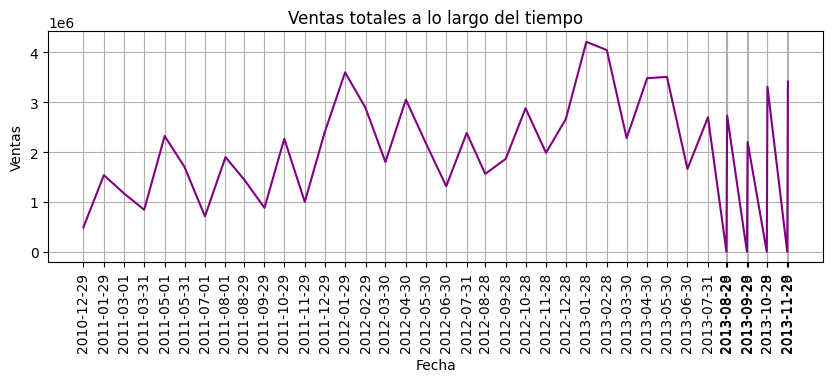

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo')
plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Mes en abreviatura y el año %b-%Y</font>**

</td>
</tr>
</table>

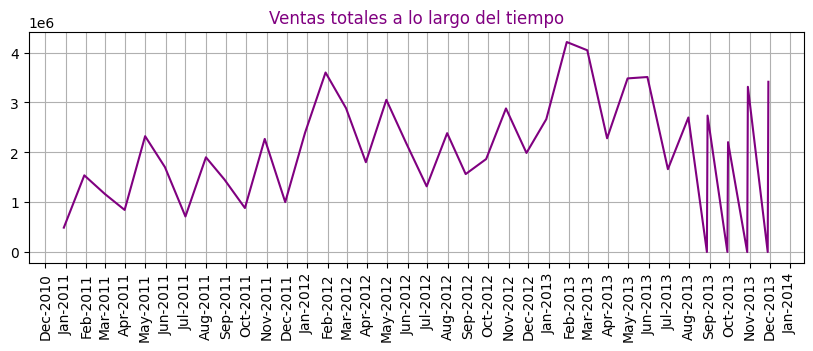

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Mes completo y el año %B-%Y</font>**

</td>
</tr>
</table>

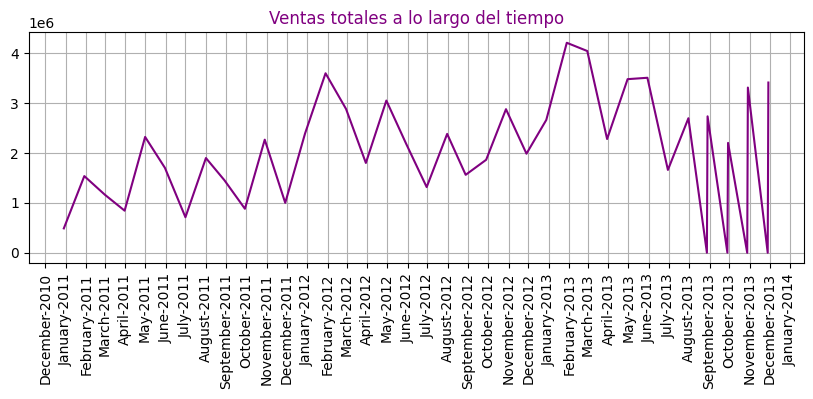

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B-%Y'))

plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Formato: %d/%m/%Y</font>**

</td>
</tr>
</table>

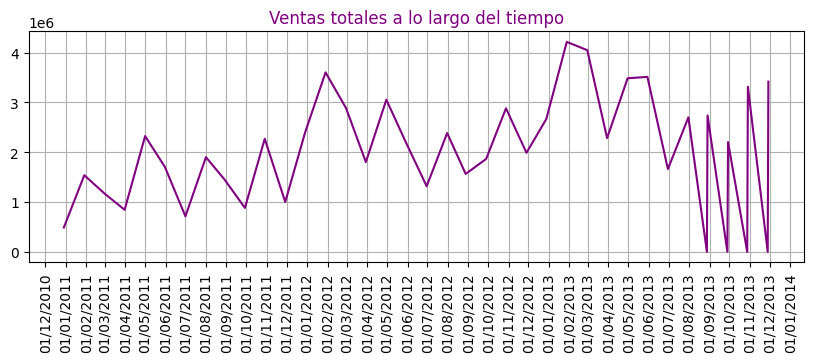

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Formato: %d-%m-%Y</font>**

</td>
</tr>
</table>

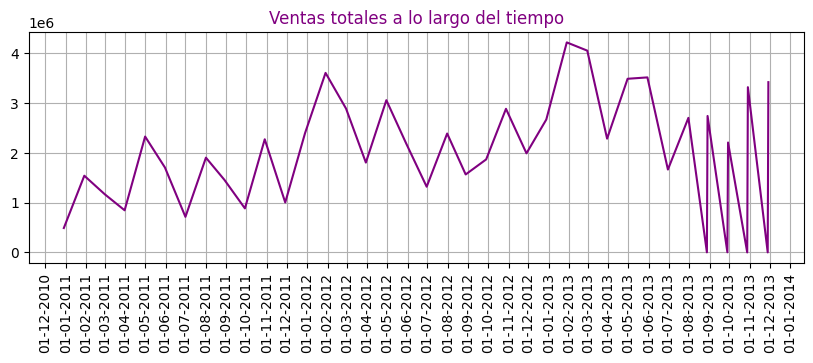

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Formato: %A-%m-%Y</font>**

</td>
</tr>
</table>

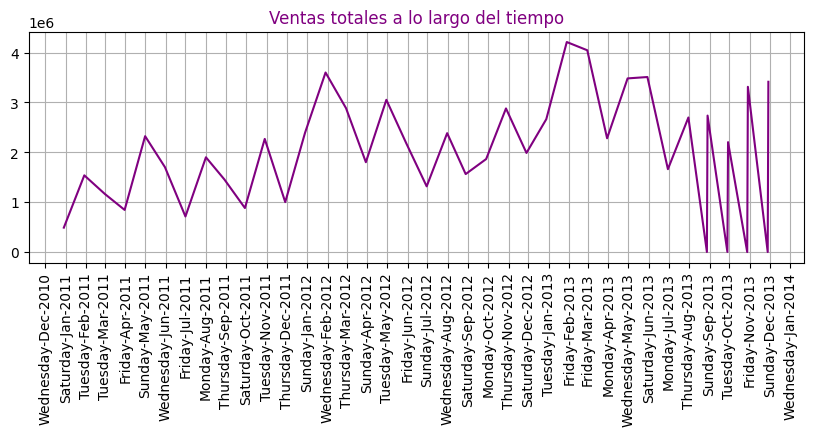

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%A-%b-%Y'))

plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Formato: %a-%m-%Y</font>**

</td>
</tr>
</table>

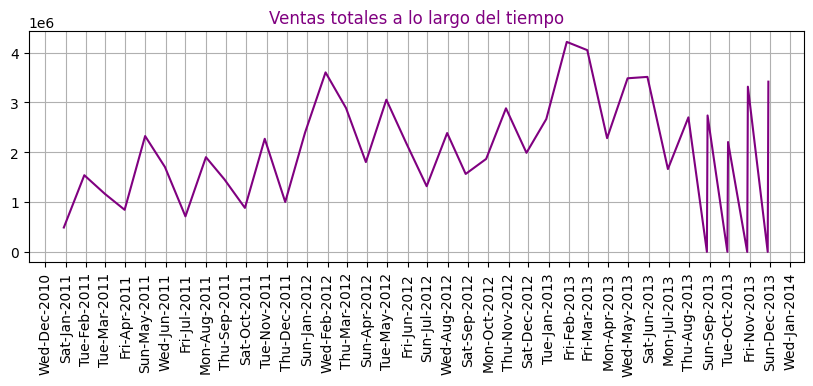

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90)
plt.title('Ventas totales a lo largo del tiempo', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a-%b-%Y'))

plt.grid(True)
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Colocar los montos en la gráfica</font>**

</td>
</tr>
</table>

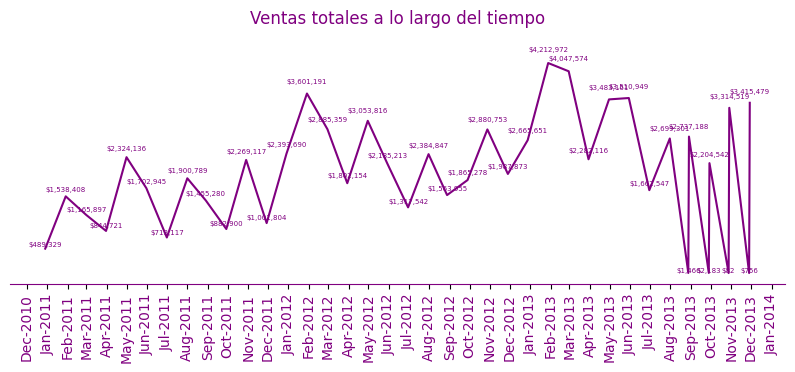

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90, color='purple')
plt.yticks([])
plt.title('Ventas totales a lo largo del tiempo\n', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

for x, y in zip(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas']):
    plt.text(x, y*1.05, f'${y:,.0f}', ha='center', va='bottom', fontsize=5, color='purple')

plt.show()

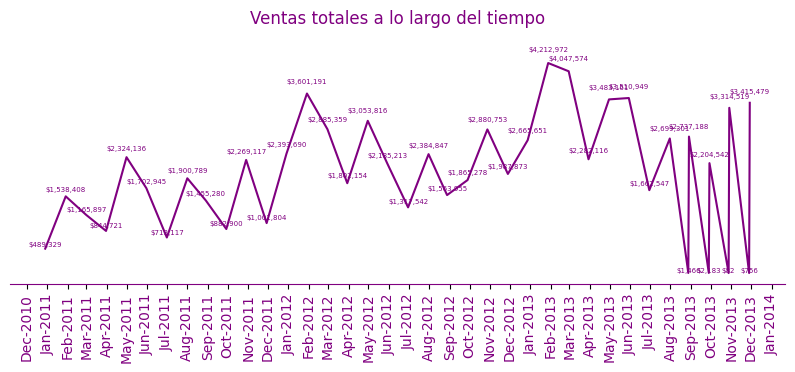

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
plt.xticks(df_ventas_x_fecha['Fecha'], rotation=90, color='purple')
plt.yticks([])
plt.title('Ventas totales a lo largo del tiempo\n', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

for x, y in zip(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas']):
    plt.text(x, y*1.05, f'${y:,.0f}', ha='center', va='bottom', fontsize=5, color='purple')

plt.show()

In [ ]:
df_ventas_x_fecha.head()

,Fecha,Ventas
0,2010-12-29,4.893286e+05
1,2011-01-29,1.538408e+06
2,2011-03-01,1.165897e+06
3,2011-03-31,8.447210e+05
4,2011-05-01,2.324136e+06


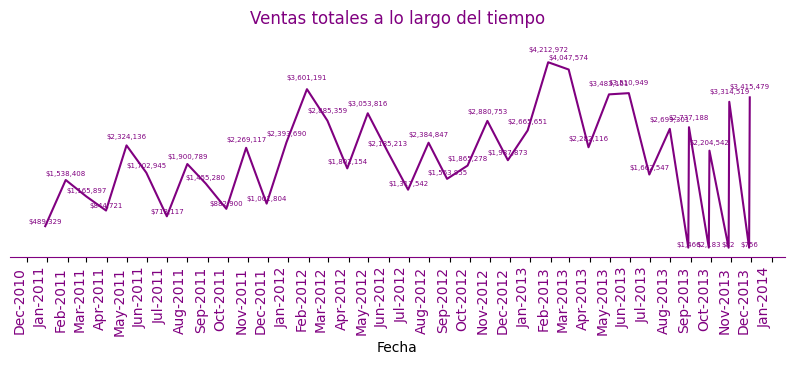

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_ventas_x_fecha = df_FactVentas.groupby('Fecha')['Ventas'].sum()
df_ventas_x_fecha.head()

plt.figure(figsize=(10, 3))
# plt.plot(df_ventas_x_fecha['Fecha'], df_ventas_x_fecha['Ventas'], color='purple')
df_ventas_x_fecha.plot(kind='line', color='purple')
plt.xticks(rotation=90, color='purple')
plt.yticks([])
plt.title('Ventas totales a lo largo del tiempo\n', color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

for x, y in zip(df_ventas_x_fecha.index, df_ventas_x_fecha.values):
    plt.text(x, y*1.05, f'${y:,.0f}', ha='center', va='bottom', fontsize=5, color='purple')

plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Gráficos de barras vertical</font>**

</td>
</tr>
</table>

Un gráfico de barras verticales es un tipo de visualización que utiliza barras rectangulares dispuestas verticalmente para representar datos.

La longitud o altura de cada barra es proporcional al valor que representa, lo que facilita la comparación entre diferentes categorías.

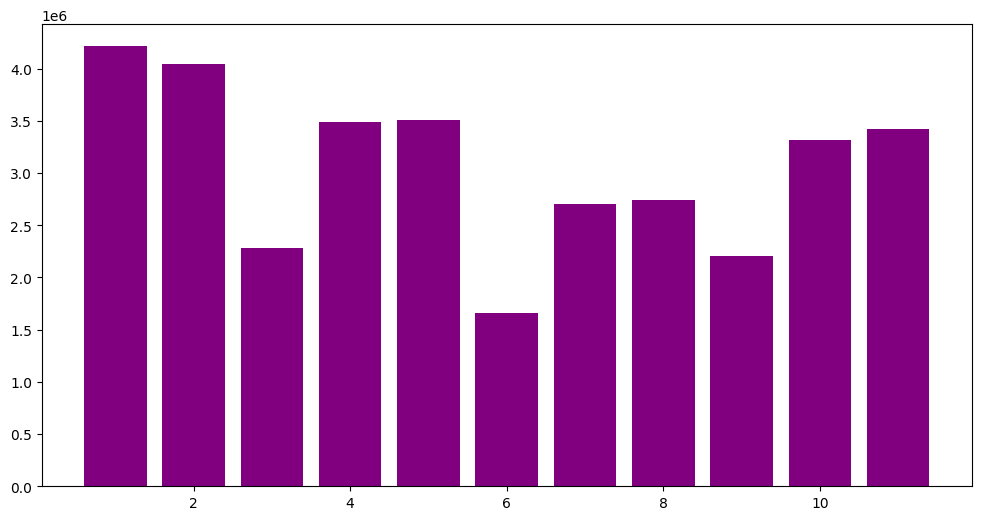

In [ ]:
año = 2013
df_ventas_x_año = df_FactVentas[df_FactVentas['Fecha'].dt.year == año].copy()
df_ventas_x_mes = df_ventas_x_año.groupby(df_ventas_x_año['Fecha'].dt.month)['Ventas'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(df_ventas_x_mes['Fecha'], df_ventas_x_mes['Ventas'], color='purple')
plt.show()

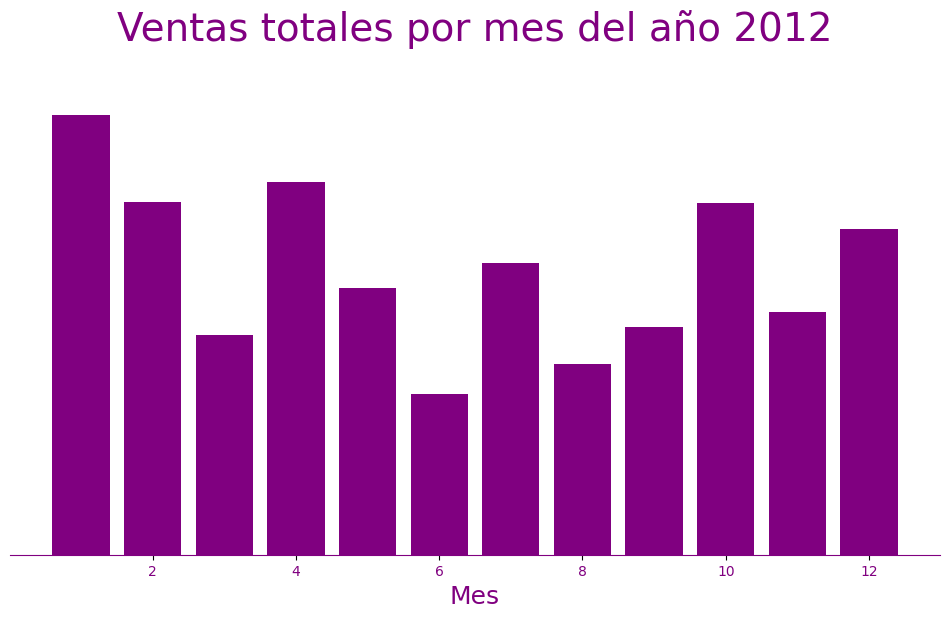

In [ ]:
año = 2012
df_ventas_x_año = df_FactVentas[df_FactVentas['Fecha'].dt.year == año].copy()
df_ventas_x_mes = df_ventas_x_año.groupby(df_ventas_x_año['Fecha'].dt.month)['Ventas'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(df_ventas_x_mes['Fecha'], df_ventas_x_mes['Ventas'], color='purple')

plt.xlabel('Mes', fontsize=18, color='purple')
plt.title(f'Ventas totales por mes del año {año}\n', color='purple', fontsize=28)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.xticks(rotation=0, color='purple')
plt.yticks([])

plt.show()

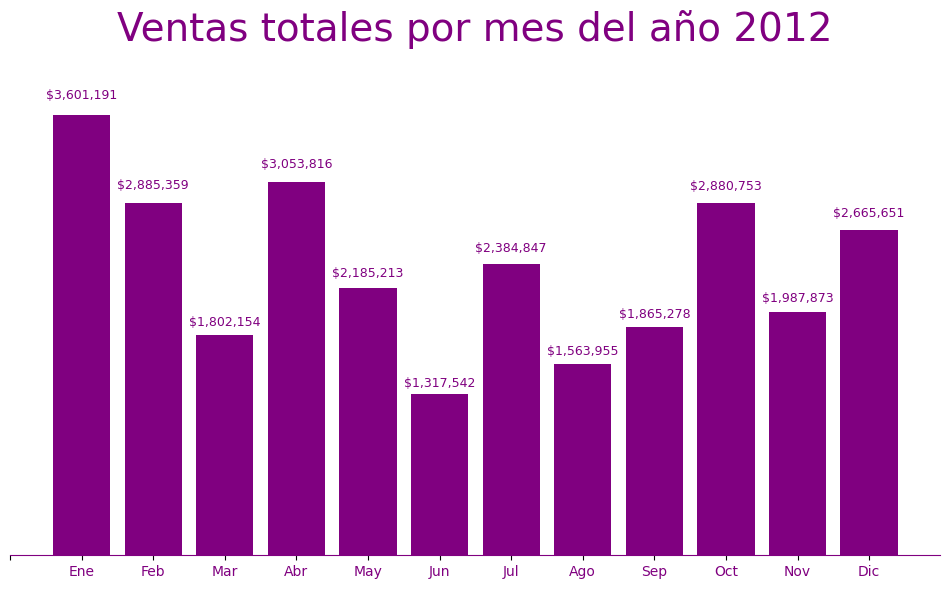

In [ ]:
año = 2012
df_ventas_x_año = df_FactVentas[df_FactVentas['Fecha'].dt.year == año].copy()
df_ventas_x_mes = df_ventas_x_año.groupby(df_ventas_x_año['Fecha'].dt.month)['Ventas'].sum().reset_index()

mes_abr = ['', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(12, 6))
plt.bar(df_ventas_x_mes['Fecha'], df_ventas_x_mes['Ventas'], color='purple')

plt.title(f'Ventas totales por mes del año {año}\n', color='purple', fontsize=28)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.xticks(ticks=range(len(mes_abr)), labels=mes_abr, rotation=0, color='purple')
plt.yticks([])


for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 1.03, f'${bar.get_height():,.0f}', ha='center', va='bottom', fontsize=9, color='purple')

plt.show()

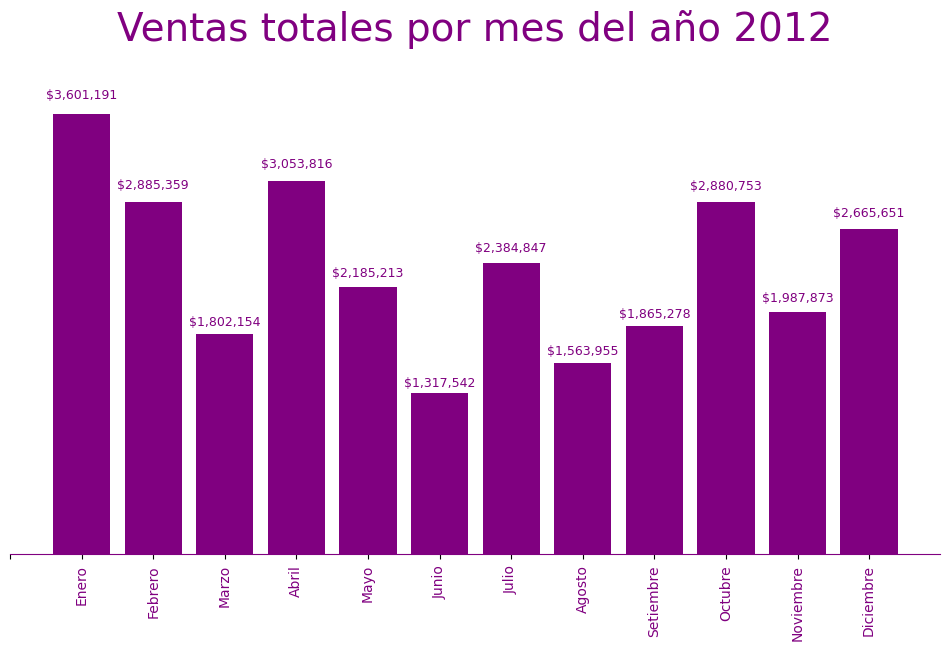

In [ ]:
año = 2012
df_ventas_x_año = df_FactVentas[df_FactVentas['Fecha'].dt.year == año].copy()
df_ventas_x_mes = df_ventas_x_año.groupby(df_ventas_x_año['Fecha'].dt.month)['Ventas'].sum().reset_index()

mes_abr = ['', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Setiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12, 6))
plt.bar(df_ventas_x_mes['Fecha'], df_ventas_x_mes['Ventas'], color='purple')

plt.title(f'Ventas totales por mes del año {año}\n', color='purple', fontsize=28)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.xticks(ticks=range(len(mes_abr)), labels=mes_abr, rotation=90, color='purple')
plt.yticks([])


for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 1.03, f'${bar.get_height():,.0f}', ha='center', va='bottom', fontsize=9, color='purple')

plt.show()

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Ventas por mes y año</font>**

</td>
</tr>
</table>

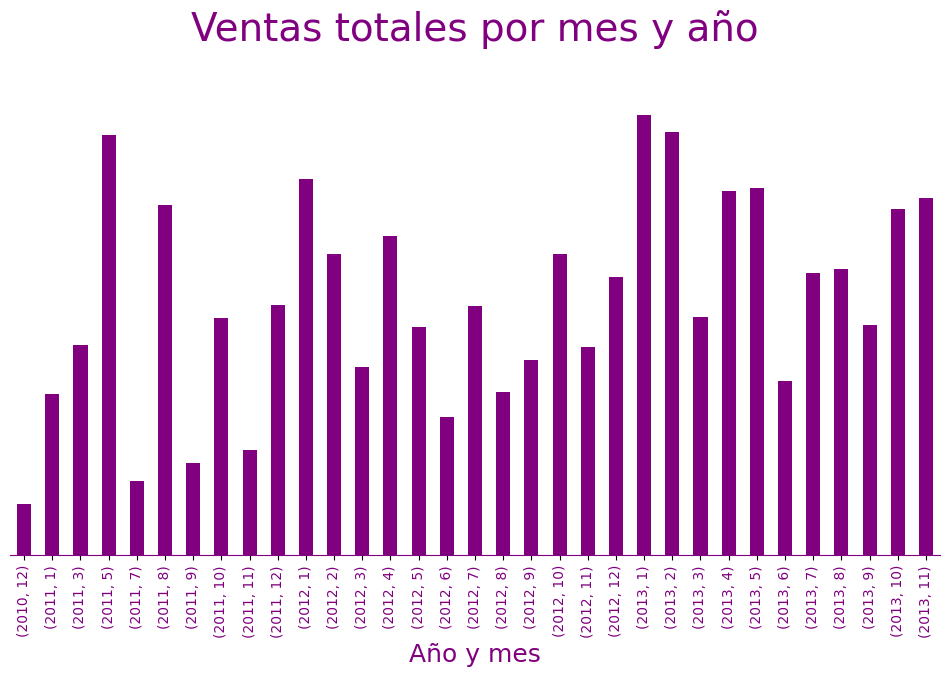

In [ ]:
df_ventas_x_mes_x_año = df_FactVentas.groupby([df_FactVentas['Fecha'].dt.year, df_FactVentas['Fecha'].dt.month])['Ventas'].sum()

df_ventas_x_mes_x_año.plot(kind='bar', figsize=(12, 6), color='purple')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.xlabel('Año y mes', fontsize=18, color='purple')

plt.title('Ventas totales por mes y año\n', color='purple', fontsize=28)

plt.xticks(color='purple')
plt.yticks([])

plt.show()

In [ ]:
df_ventas_x_mes_x_año = df_FactVentas.groupby([df_FactVentas['Año'], df_FactVentas['MesNum'], df_FactVentas['MesAbr']])['Ventas'].sum().reset_index()
df_ventas_x_mes_x_año.columns = ['Año', 'Mes', 'MesAbr', 'Ventas']
df_ventas_x_mes_x_año['MesAño'] = df_ventas_x_mes_x_año['MesAbr'].astype(str) + '-' + df_ventas_x_mes_x_año['Año'].astype(str)
df_ventas_x_mes_x_año.head()

,Año,Mes,MesAbr,Ventas,MesAño
0,2010,12,Dec,4.893286e+05,Dec-2010
1,2011,1,Jan,1.538408e+06,Jan-2011
2,2011,3,Mar,2.010618e+06,Mar-2011
3,2011,5,May,4.027080e+06,May-2011
4,2011,7,Jul,7.131167e+05,Jul-2011


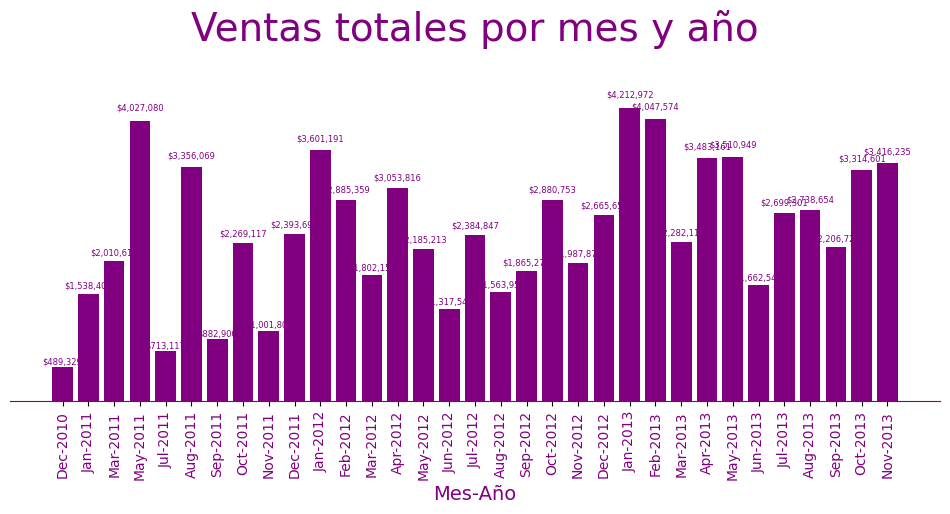

In [ ]:

plt.figure(figsize=(12, 4))

barras = plt.bar(df_ventas_x_mes_x_año['MesAño'], df_ventas_x_mes_x_año['Ventas'], color='purple')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.xlabel('Mes-Año', fontsize=14, color='purple')

plt.title('Ventas totales por mes y año\n', color='purple', fontsize=28)

plt.xticks(color='purple', rotation=90)
plt.yticks([])

for bar in barras:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 1.03, f'${bar.get_height():,.0f}', ha='center', va='bottom', fontsize=6, color='purple')

plt.show()

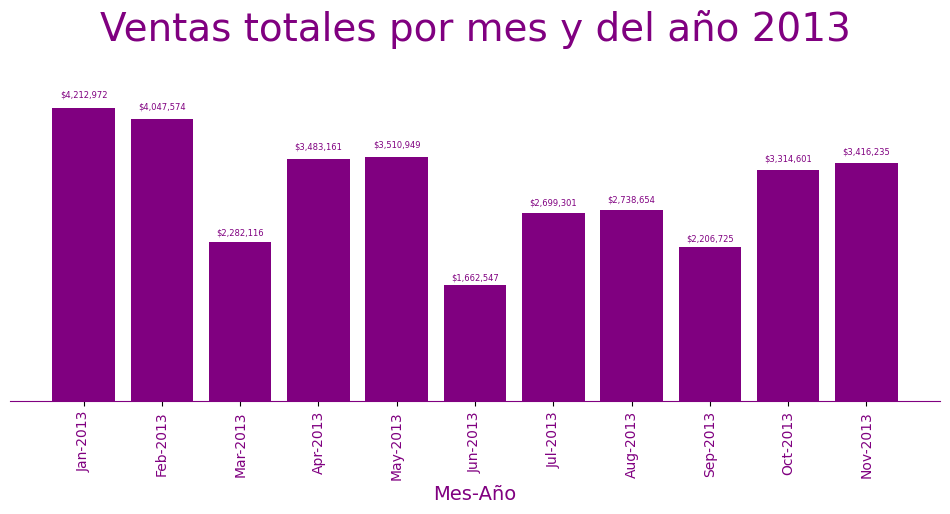

In [ ]:
año=2013

df_filtro = df_ventas_x_mes_x_año[df_ventas_x_mes_x_año['Año'] == año]

plt.figure(figsize=(12, 4))

barras = plt.bar(df_filtro['MesAño'], df_filtro['Ventas'], color='purple')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.xlabel('Mes-Año', fontsize=14, color='purple')

plt.title(f'Ventas totales por mes y del año {año}\n', color='purple', fontsize=28)

plt.xticks(color='purple', rotation=90)
plt.yticks([])

for bar in barras:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 1.03, f'${bar.get_height():,.0f}', ha='center', va='bottom', fontsize=6, color='purple')

plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Gráficos de barras horizontal</font>**

</td>
</tr>
</table>

<Figure size 1200x400 with 0 Axes>

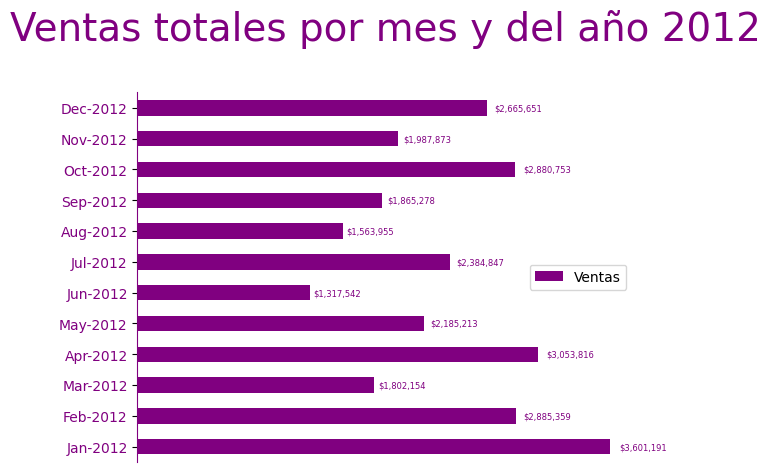

In [ ]:
año=2012

df_filtro = df_ventas_x_mes_x_año[df_ventas_x_mes_x_año['Año'] == año]

plt.figure(figsize=(12, 4))

df_filtro.plot(kind='barh', x='MesAño', y='Ventas', color='purple')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.gca().spines['left'].set_color('purple')
plt.gca().spines['bottom'].set_color('purple')

plt.xlabel('')
plt.ylabel('')

plt.title(f'Ventas totales por mes y del año {año}\n', color='purple', fontsize=28)

plt.yticks(color='purple')
plt.xticks([])

for bar in plt.gca().patches:
    plt.text(bar.get_width()*1.02, bar.get_y() + bar.get_height() / 2, f'${bar.get_width():,.0f}', ha='left', va='center', fontsize=6, color='purple')

plt.show()

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">Gráficos de columnas apiladas</font>**

</td>
</tr>
</table>

Los gráficos de columnas apiladas son una herramienta visual útil para mostrar y comparar datos categóricos de manera clara.

<table width='99%'>
<tr>
<td bgcolor='#306998'>

### **<font color="#FFFFFF">Características</font>**

</td>
</tr>
</table>

>* **Eje vertical**: Representa la suma total de todas las categorías apiladas.
>* **Eje horizontal**: Muestra las diferentes categorías o grupos.
>* **Segmentos apilados**: Cada segmento en la columna representa una parte de la serie de datos, y el tamaño del segmento indica la magnitud de esa parte.

<table width='99%'>
<tr>
<td bgcolor='#FFD43B'>

## **<font color="#000000">¿Para que sirven?</font>**

</td>
</tr>
</table>

>* **Comparación de totales**: Permiten ver rápidamente el total de cada categoría, así como las contribuciones individuales de cada serie.
>* **Visualización de la composición**: Ayudan a analizar cómo se compone cada total a partir de sus partes. Por ejemplo, en un gráfico de ventas, se puede ver cómo se distribuyen las ventas por producto y región.
>* **Tendencias a lo largo del tiempo**: Es útil para mostrar cambios en la composición de datos a lo largo del tiempo. Por ejemplo, se puede observar cómo ha variado la participación de diferentes productos en las ventas totales de una empresa a lo largo de varios años.
>* **Facilidad de interpretación**: Al apilar las columnas, se simplifica la comparación de diferentes categorías sin la necesidad de múltiples gráficos.

In [ ]:
import numpy as np

año = 2012

df_mes_year_costos = df_FactVentas[df_FactVentas['Año'] == año].groupby(['Año', 'MesNum', 'MesAbr'])['Costos'].sum().reset_index()
df_mes_year_costos.columns = ['Año', 'Mes', 'MesAbr', 'Costos']
df_mes_year_costos['MesAño'] = df_mes_year_costos['MesAbr'].astype(str) + '-' + df_mes_year_costos['Año'].astype(str)

df_mes_year_ventas = df_FactVentas[df_FactVentas['Año'] == año].groupby(['Año', 'MesNum', 'MesAbr'])['Ventas'].sum().reset_index()
df_mes_year_ventas.columns = ['Año', 'Mes', 'MesAbr', 'Ventas']
df_mes_year_ventas['MesAño'] = df_mes_year_costos['MesAbr'].astype(str) + '-' + df_mes_year_costos['Año'].astype(str)

df_mes_year_utilidad = df_FactVentas[df_FactVentas['Año'] == año].groupby(['Año', 'MesNum', 'MesAbr'])['Utilidad'].sum().reset_index()
df_mes_year_utilidad.columns = ['Año', 'Mes', 'MesAbr', 'Utilidad']
df_mes_year_utilidad['MesAño'] = df_mes_year_costos['MesAbr'].astype(str) + '-' + df_mes_year_costos['Año'].astype(str)
df_mes_year_utilidad


plt.figure(figsize=(12, 4))

barra1 = plt.bar(df_mes_year_costos['MesAño'], df_mes_year_costos['Costos'], color='purple', label='Costos')
barra2 = plt.bar(df_mes_year_costos['MesAño'], df_mes_year_ventas['Ventas'], color='red', label='Ventas', bottom=df_mes_year_costos['Costos'])
barra3 = plt.bar(df_mes_year_costos['MesAño'], df_mes_year_utilidad['Utilidad'], color='green', label='Utilidad', bottom = df_mes_year_costos['Costos'] + df_mes_year_ventas['Ventas'])

plt.gca

plt.xticks(color='purple', rotation=90)
plt.yticks([])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')

plt.show()

NameError: name 'df_FactVentas' is not defined